In [2]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

max_features = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
print(f"Training samples: {len(x_train)}\nTest samples: {len(x_test)}")

Training samples: 25000
Test samples: 25000


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
40/40 - 6s - 144ms/step - accuracy: 0.6409 - loss: 0.6814 - val_accuracy: 0.7204 - val_loss: 0.6519
Epoch 2/5
40/40 - 5s - 132ms/step - accuracy: 0.7405 - loss: 0.6033 - val_accuracy: 0.7866 - val_loss: 0.5310
Epoch 3/5
40/40 - 5s - 115ms/step - accuracy: 0.8204 - loss: 0.4617 - val_accuracy: 0.8150 - val_loss: 0.4202
Epoch 4/5
40/40 - 6s - 160ms/step - accuracy: 0.8577 - loss: 0.3610 - val_accuracy: 0.8508 - val_loss: 0.3553
Epoch 5/5
40/40 - 4s - 93ms/step - accuracy: 0.8813 - loss: 0.3032 - val_accuracy: 0.8604 - val_loss: 0.3293
782/782 - 2s - 3ms/step - accuracy: 0.8573 - loss: 0.3307
Test Accuracy = 0.8573
Test Loss = 0.3307


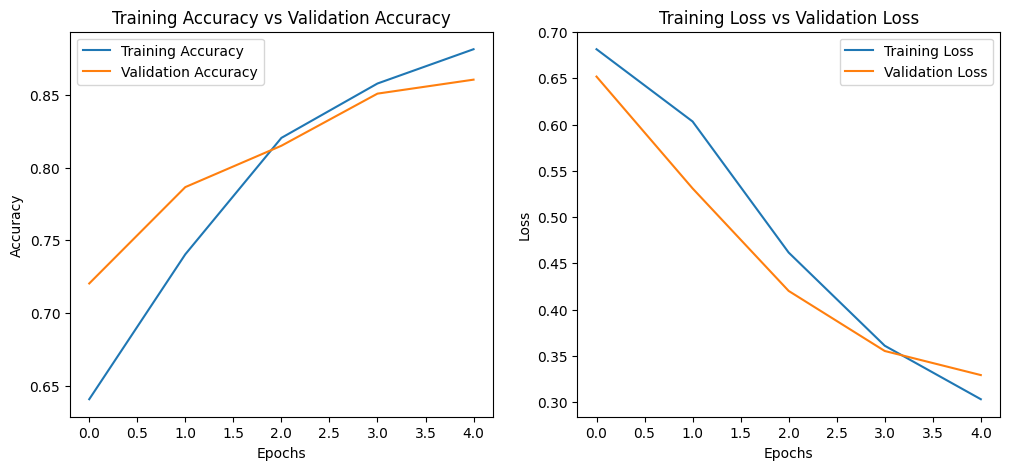

In [12]:
#ANN model
ann_model = models.Sequential([
    layers.Embedding(input_dim = max_features, output_dim = 64),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
#Compile
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Summary
ann_model.summary()
#Train
history_ann = ann_model.fit(
    x_train, y_train,
    epochs = 5,
    batch_size = 512,
    validation_split = 0.2,
    verbose = 2
)
#Evaluation
test_loss, test_acc = ann_model.evaluate(x_test, y_test, verbose = 2)
print(f'Test Accuracy = {test_acc:.4f}')
print(f'Test Loss = {test_loss:.4f}')
#Accuracy plot
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(history_ann.history['accuracy'], label = 'Training Accuracy', linestyle = '-')
plt.plot(history_ann.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#Loss plot
plt.subplot(1,2,2)
plt.plot(history_ann.history['loss'], label = 'Training Loss', linestyle = '-')
plt.plot(history_ann.history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()